Promblem Statement: As a customer wants to buy a car, they expect the car to have a mileage as per the use for example a customer wants for daily city commuting or are fuel sensitivity, they will want a high mileage car and for customers who occasionally drive, use it on highway they will most likely to buy a low mileage car.

Objective: The objective of this project is to predict the mileage of a car using its features.

Who can use this model:Any customer or dealership can use this model to predict the mileage of a car. A customer can use this model to predict the mileage of the car and a dealership could use it for suggesting a car to the customer for their needs.

Data Description:There are 406 rows and 9 columns.
1) Mpg: A continuous data containing the mile per gallon/ mileage. It is the target variable.
2) Cylinders: A categorical data containing the no of cylinders in the car’s engine.
3) Displacement: A continuous data containing the engine size of the car.
4) Horsepower: A continuous data containing the power output of the engine of the car.
5) Weight: A continuous data containing the weight of the car.
6) Acceleration: A continuous data containing the time it took to accelerate from 0-60 mpg.

Data Preprocessing:
1. Null detection and processing: There was null data was present in the mpg (Target) and horsepower. The null data in the columns are less than 4% in both columns so we dropped the null rows. Therefore, the number of rows is 392. As the column named car name has no relevance with the mileage.
2. Outlier detection and processing: There was outliers detected in the horsepower and acceleration by using the boxplot which uses IQR (Inter Quartile Ratio). By using the IQR I have replaced the values which are lower than the lower whisker (1-IQR * 1.5) is replaced by the lower whisker and the values above the upper whisker (1+IQR * 1.5) are replaced by the upper whisker.
3. Skewness detection and processing: There was high skewness in displacement and horsepower data columns. As the columns are highly correlated to the target value, we do not remove the skewness.
4. Object Encoding: As there is no object type data in the dataset.
5. Scaling: I have applied Standard Scaler to scale the data down.

6. Models Applied: 
Continuous Models:  I have divided the data into training and testing data.
1. Linear Regression: I had applied linear regression model on the dataset but it has failed the 4 assumptions of Linear regression and the accuracy score was 79%.
2. Polynomial Regression: I had applied Polynomial features to the x_train and x_test and applied linear regression model. It gave me the accuracy score of 83% on degree 2 after hyperparameter tuning. But the training score was higher then the testing score as 90% with training and 83% testing which also means there was overfitting.
3. Lasso and Ridge: I applied l1 and l2 regularization and still there was overfitting being applied.
4. Decision Tree Regressor: I have also applied Decision Tree Regressor which gave me an accuracy of 69% but still there was overfitting in the model. After that I have applied hyperparameter tuning by using GridSearchCV. But even after that I got an accuracy of 75% and overfitting was still present in the model.
5. Random Forest Regressor: I have also applied Random Forest Regressor which gave me an accuracy of 86% and overfitting was still present in the model. After that I have applied hyperparameter tuning by using GridSearchCV. But even after that I got an accuracy of 81% and overfitting was still present in the model but it was lesser than before with a 7-point difference but as I want a high accuracy, I will be using classification models.
Classification Models: I have divided the data in the mpg data column by 23 and all mileage into low and high. I have chosen 23 as the dividing point as after many experiments I got a balance data point.
1. Decision Tree Classifier:  I have applied Decision Tree Classifier and have gained the accuracy of 91% and over fitting was still there in the model. After I applied hyperparameter tuning, I got an accuracy of 95% and a 4 of overfitting.
2. Random Forest Classifier:  I applied Random Forest Classifier and I got an accuracy of 92% and 5 in overfitting. After I applied hyperparameter tuning, I still got an accuracy of 92% and overfitting of 5.
7. Best Model Selected:  I have selected the Decision Tree Classifier with the parameters of max_depth =7 and min_samples_leaf=2.
8. Future Enhancement: There could be more enhancement done too the model by hyperparameter tuning and lower the overfitting. Or you can even use other classification models
9.	Conclusion: In conclusion there could be more enhancement done to the models and many more classification type models.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,"""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,"""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,"""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,"""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,"""ford torino"""


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


We will be removing the car_name data column as it has no correlation to the mile per galon(mpg)

In [4]:
df.drop("car_name",axis=1,inplace=True)

In [5]:
print(df.isnull().sum()/len(df)*100)

mpg             1.970443
cylinders       0.000000
displacement    0.000000
horsepower      1.477833
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
dtype: float64


As the null data in the columns which are mpg(Target), horsepower are below 4% so we will drop the null data rows

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(8)
memory usage: 27.6 KB


In [10]:
for i in df.columns:
    print(df[i].nunique(),"\n",df[i].value_counts())

127 
 mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
28.1     1
24.2     1
30.7     1
22.4     1
44.0     1
Name: count, Length: 127, dtype: int64
5 
 cylinders
4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: count, dtype: int64
81 
 displacement
97.0     21
350.0    18
318.0    17
250.0    17
98.0     17
         ..
131.0     1
81.0      1
145.0     1
181.0     1
144.0     1
Name: count, Length: 81, dtype: int64
93 
 horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
77.0      1
132.0     1
64.0      1
116.0     1
82.0      1
Name: count, Length: 93, dtype: int64
346 
 weight
2130.0    4
1985.0    4
2125.0    3
2300.0    3
2265.0    3
         ..
2430.0    1
2375.0    1
2234.0    1
2648.0    1
2625.0    1
Name: count, Length: 346, dtype: int64
95 
 acceleration
14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
20.4     1
17.1     1
15.6     1
24.6     1
11.6     1
Name: count, Length: 95, dtype: int64


In [11]:
num_cols=list(df.columns)
num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

In [12]:
rm=["cylinders","model_year","origin"]
for i in rm:
    num_cols.remove(i)
num_cols

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

In [13]:
num_cols.remove('mpg')

In [14]:
df["mpg"].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

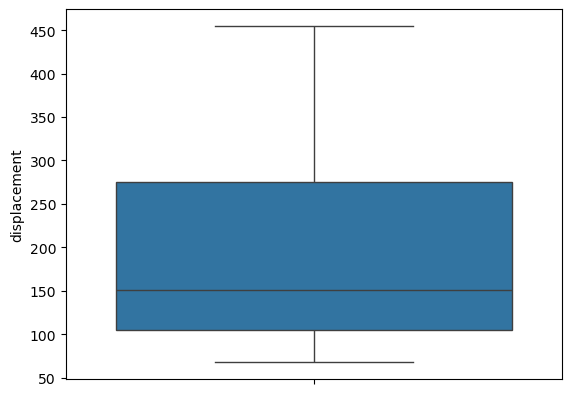

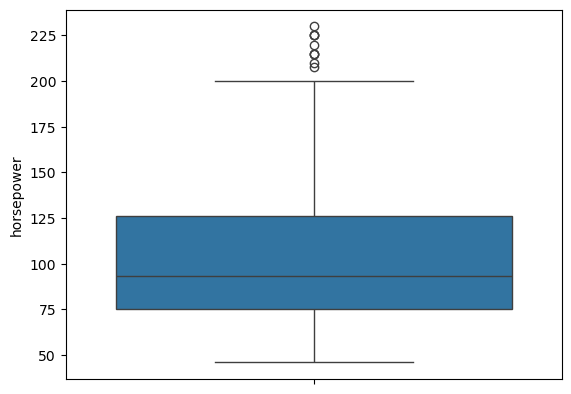

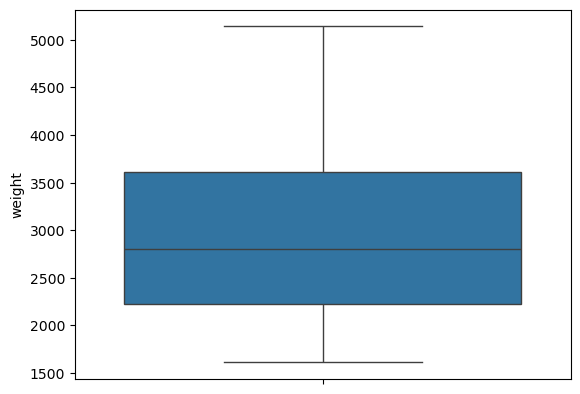

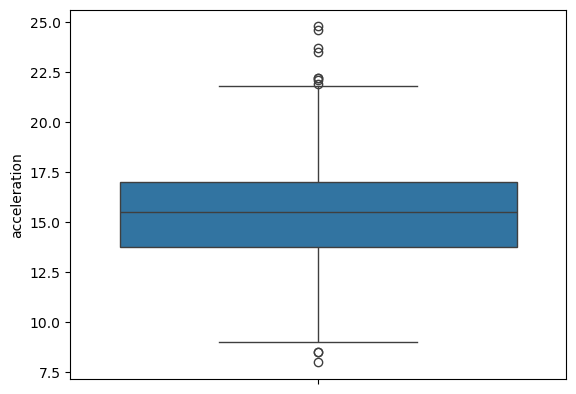

In [15]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

As we can see that only horse power and accelaration columns has outliers in it

In [16]:
def removing_outliers(d):
    for i in num_cols:
        q1=d[i].quantile(0.25)
        q3=d[i].quantile(0.75)
        iqr=q3-q1
        lw=q1-(1.5*iqr)
        uw=q3+(1.5*iqr)
        d[i]=d[i].apply(lambda x:min(max(x,lw),uw))
    return d

In [17]:
removing_outliers(df)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,21.9,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


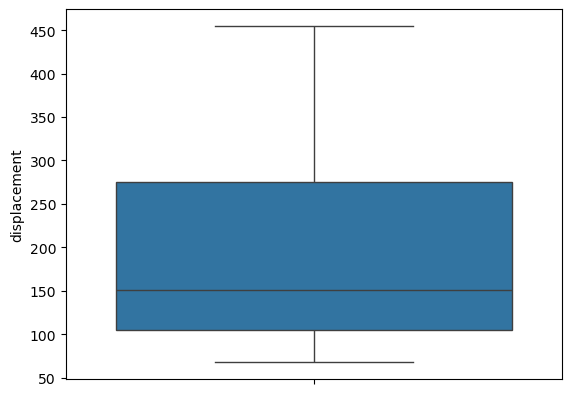

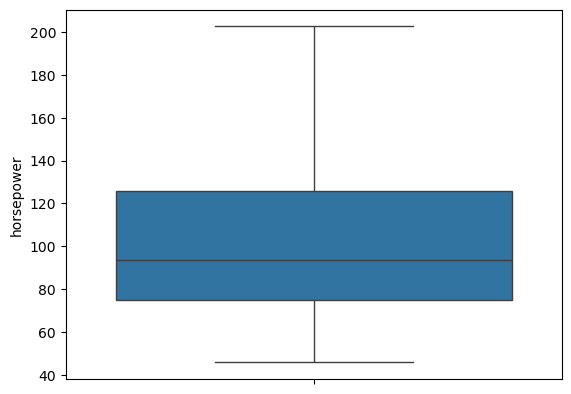

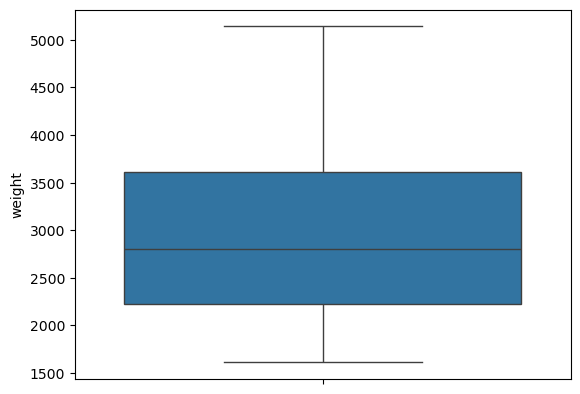

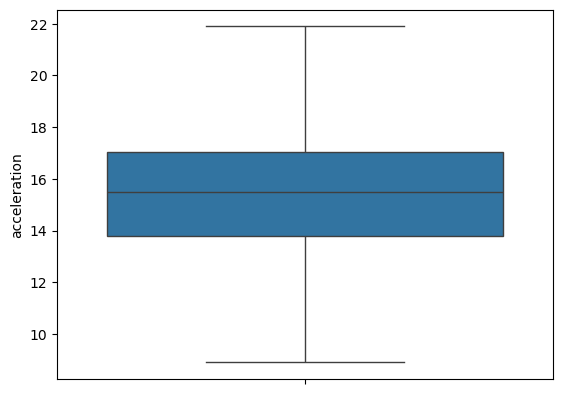

In [18]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

All of the outliers have been removed

In [19]:
from scipy.stats import skew
for i in num_cols:
    print(i,skew(df[i]))

displacement 0.6989812823521123
horsepower 0.9427177130629499
weight 0.5175953464678735
acceleration 0.15279728203827458


High skewness:
1. displacement
2. horsepower

In [20]:
num_cols.append('mpg')

In [21]:
print(df[num_cols].corr()["mpg"])

displacement   -0.805127
horsepower     -0.788856
weight         -0.832244
acceleration    0.421393
mpg             1.000000
Name: mpg, dtype: float64


As the correlation is high between the high skewed data columns so we do not remove the skewness

There are no object type data column

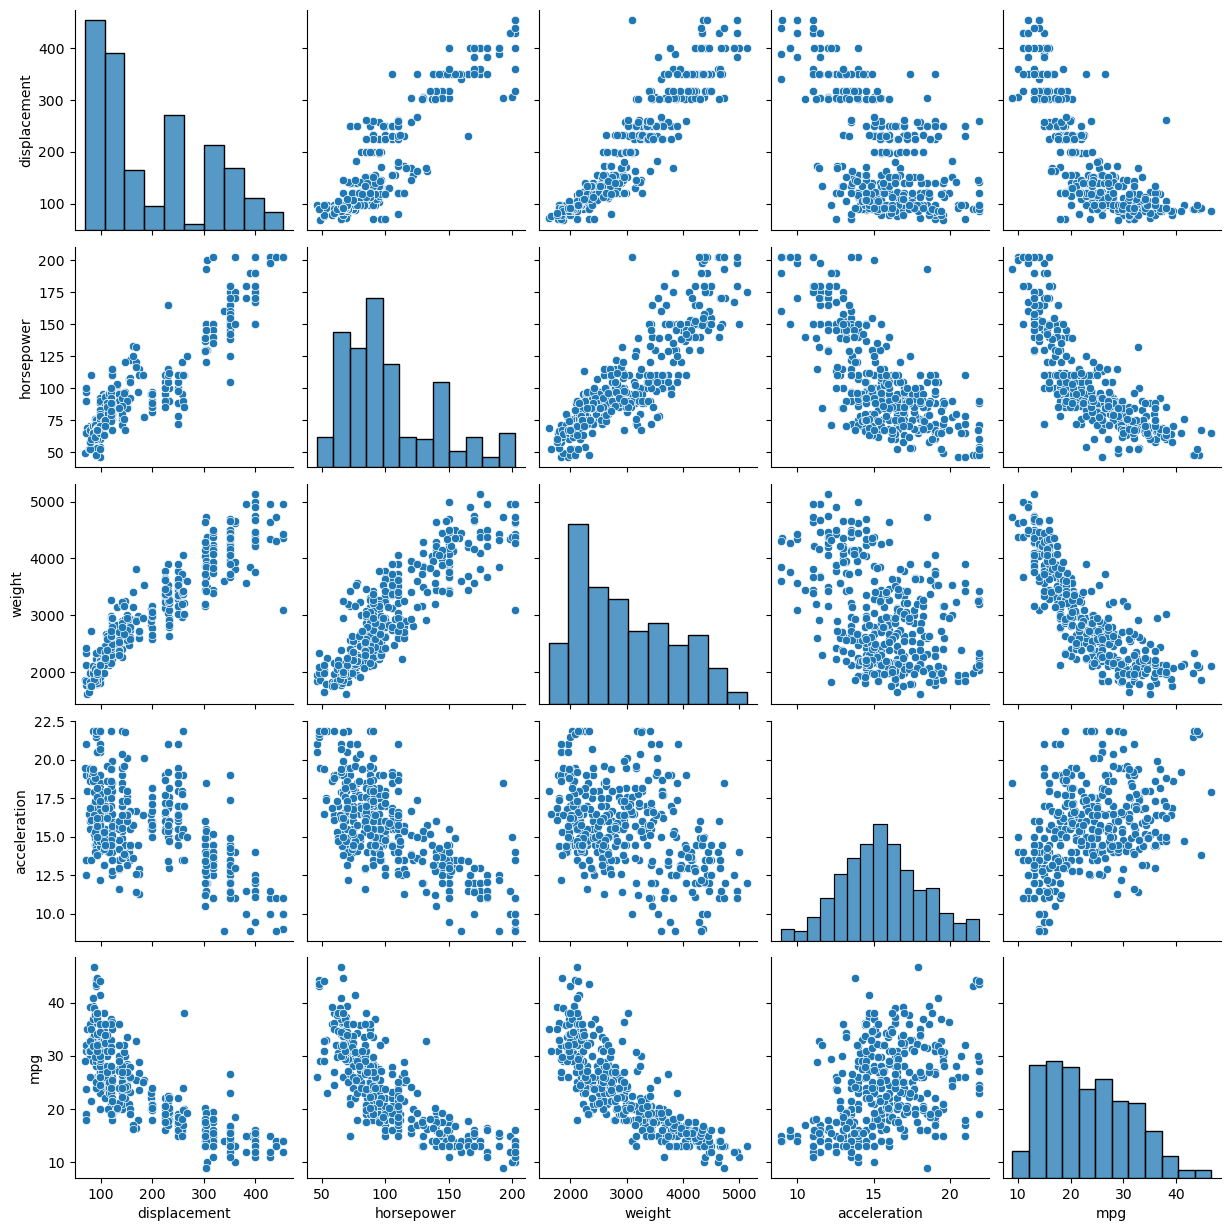

In [22]:
sns.pairplot(df[num_cols])

There is no linearity between the target and the features

<Axes: >

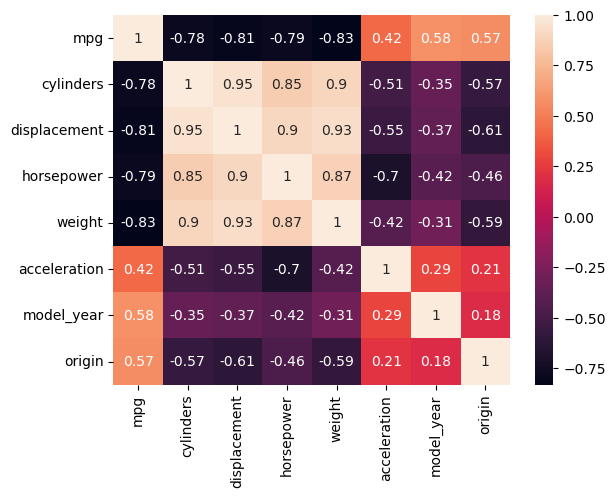

In [23]:
sns.heatmap(data=df.corr(),annot=True)

No muliticolinearity failed

In [24]:
features=df.drop("mpg",axis=1)
target=df["mpg"]

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features.iloc[:]=ss.fit_transform(features.iloc[:])
features.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.483947,1.077290,0.696416,0.620540,-1.315949,-1.625315,-0.716641
1,1.483947,1.488732,1.635835,0.843334,-1.502838,-1.625315,-0.716641
2,1.483947,1.182542,1.233227,0.540382,-1.689727,-1.625315,-0.716641
3,1.483947,1.048584,1.233227,0.536845,-1.315949,-1.625315,-0.716641
4,1.483947,1.029447,0.964821,0.555706,-1.876617,-1.625315,-0.716641


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=47)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(313, 7) (313,)
(79, 7) (79,)


Parametric Models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mse:",mean_squared_error(y_test,y_pred))
print("Accuracy (r2 score*100):",r2_score(y_test,y_pred)*100)

mse: 10.660901267795294
Accuracy (r2 score*100): 79.8999470262655


<Axes: xlabel='mpg', ylabel='mpg'>

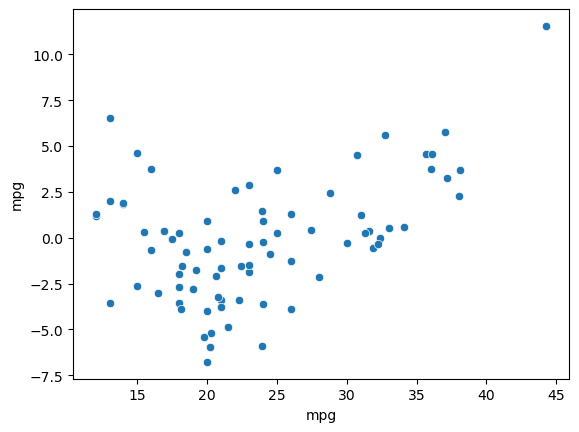

In [28]:
sns.scatterplot(x=y_test,y=(y_test-y_pred))

Homoscedacity is failed as the variance of the errors are not constant

0.5636768763895296


<Axes: xlabel='mpg', ylabel='Density'>

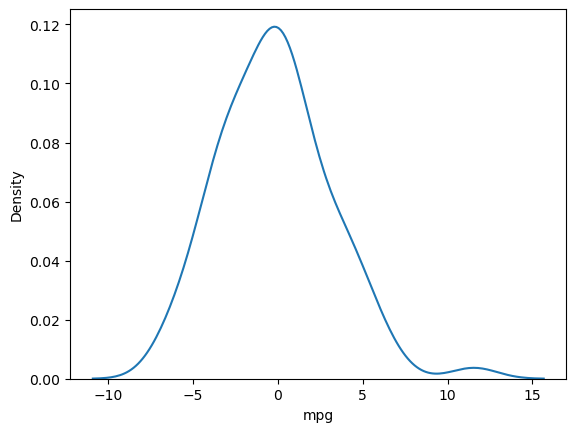

In [29]:
print(skew((y_test-y_pred)))
sns.kdeplot((y_test-y_pred))

Normality fails as the data is not normaly distibuted

In [30]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,8):
    poly=PolynomialFeatures(degree=i)
    xtrainp=poly.fit_transform(x_train)
    xtestp=poly.fit_transform(x_test)
    print("degree ",i,xtrainp.shape)
    lr1=LinearRegression()
    lr1.fit(xtrainp,y_train)
    y_pred=lr1.predict(xtestp)
    mser=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print("mse:",mser)
    print("R2:",r2)

degree  2 (313, 36)
mse: 8.776950127935368
R2: 0.834519466893243
degree  3 (313, 120)
mse: 12.311407286227453
R2: 0.7678808457011739
degree  4 (313, 330)
mse: 11071.479459065498
R2: -207.74156699778845
degree  5 (313, 792)
mse: 1720.288508343745
R2: -31.43430295360647
degree  6 (313, 1716)
mse: 2861.755657793866
R2: -52.955513586176124
degree  7 (313, 3432)
mse: 2734.168415153049
R2: -50.549984943302306


In [31]:
poly=PolynomialFeatures(degree=2)
xtrainp=poly.fit_transform(x_train)
xtestp=poly.fit_transform(x_test)
lr1=LinearRegression()
lr1.fit(xtrainp,y_train)
y_pred=lr1.predict(xtestp)
mser=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mser)
print("R2:",r2)

mse: 8.776950127935368
R2: 0.834519466893243


Accuracy with degree 2 is 83%

In [32]:
print(lr1.score(xtrainp,y_train))
print(lr1.score(xtestp,y_test))

0.9020950557133911
0.834519466893243


In [33]:
from sklearn.linear_model import Lasso

for i in [0.01,0.1,1,10]:
    l=Lasso(alpha=i)
    l.fit(xtrainp,y_train)
    print(i,"Train",l.score(xtrainp,y_train),"Test", l.score(xtestp,y_test))

0.01 Train 0.9010573282368535 Test 0.8417545219138893
0.1 Train 0.8903193898202711 Test 0.843782809322785
1 Train 0.7953070181808761 Test 0.7510482959624505
10 Train 0.0 Test -0.0002237976932455421


In [34]:
from sklearn.linear_model import Ridge

for alpha in [0.01,0.1,1,10]:
    r=Ridge(alpha=alpha)
    r.fit(xtrainp, y_train)
    print(alpha,"Train",r.score(xtrainp,y_train),"Test", r.score(xtestp,y_test))

0.01 Train 0.9020949973527812 Test 0.8345660587040447
0.1 Train 0.9020901126289581 Test 0.834940219438651
1 Train 0.9018790159088593 Test 0.8370821957618841
10 Train 0.8985113140784003 Test 0.8409058177929998


Non Parametric Models

In [35]:
def mymodel_regression(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print("mse",mse)
    print("r2 Accuracy",r2)
    sns.scatterplot(x=y_pred,y=(y_test-y_pred))
    plt.show()
    sns.kdeplot((y_test-y_pred))
    plt.show()
    return model 

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Training Score 1.0
Testing Score 0.6361179860421866
mse 19.299999999999997
r2 Accuracy 0.6361179860421866


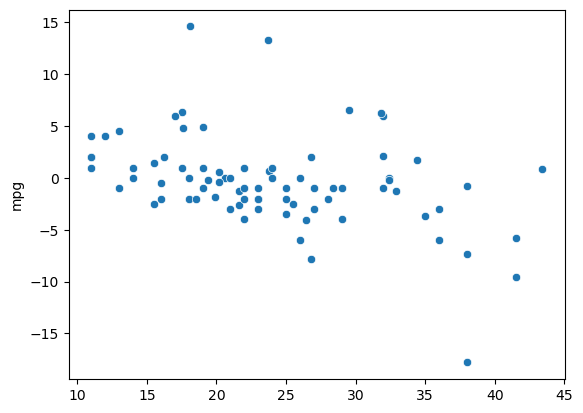

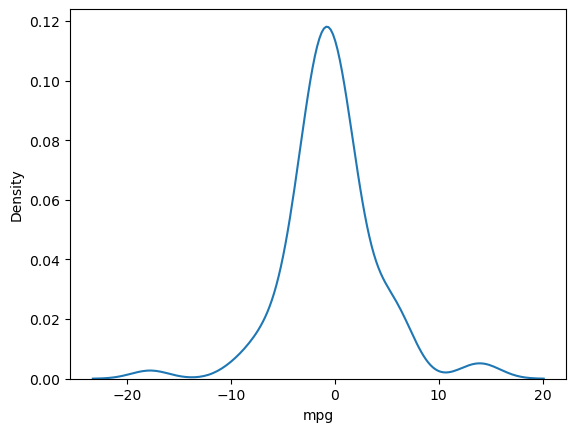

DecisionTreeRegressor()

In [37]:
dtr=mymodel_regression(DecisionTreeRegressor())
dtr

71% Accuracy and Training Score>Testing Score=Overfitting

In [38]:
parameters={"max_depth":list(range(2,5)),"min_samples_split":list(range(2,5)),"min_samples_leaf":list(range(2,5)),"criterion":["squared_error","absolute_error"]}
clf=GridSearchCV(DecisionTreeRegressor(),parameters,verbose=2)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=2, min_samples_spl

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

Training Score 0.8390587694090598
Testing Score 0.7518514949565416
mse 13.161590745438685
r2 Accuracy 0.7518514949565416


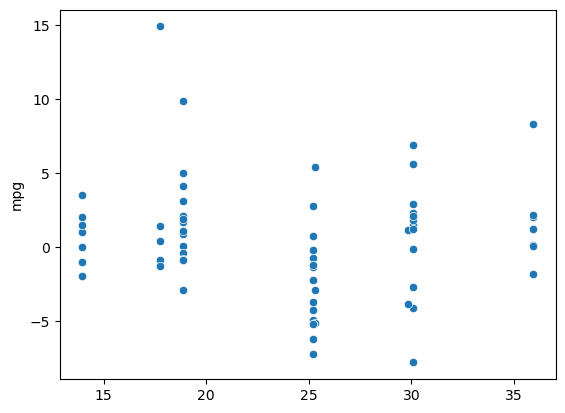

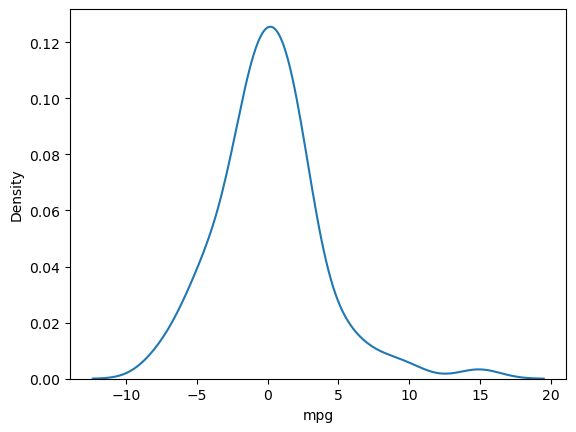

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4)

In [39]:
dthp=mymodel_regression(clf.best_estimator_)
dthp

75% Accuracy

Training Score 0.9827575094421993
Testing Score 0.8685327762529507
mse 6.972912430379739
r2 Accuracy 0.8685327762529507


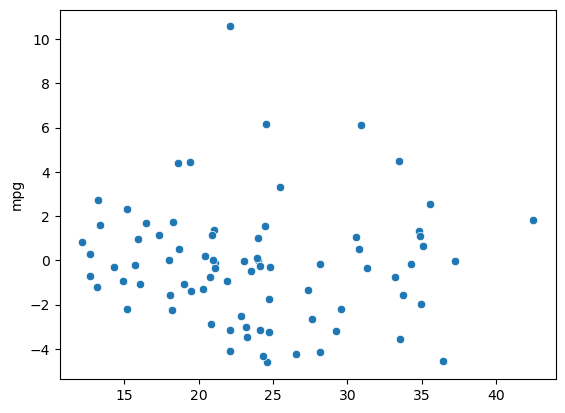

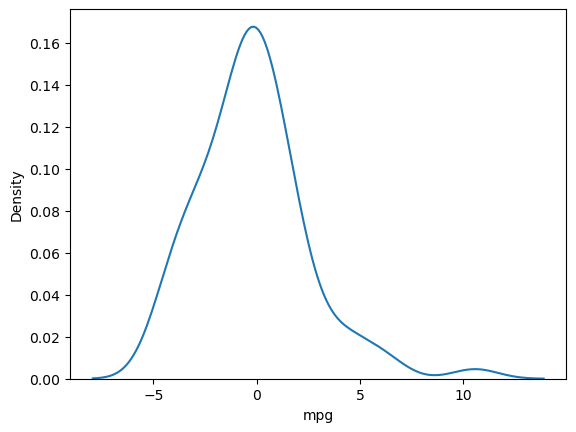

RandomForestRegressor()

In [40]:
rf=mymodel_regression(RandomForestRegressor())
rf

86% Accuracy Testing Score>Training Score=Overfitting

In [41]:
parameters={"n_estimators":[70,80,120],"max_depth":list(range(2,4)),"min_samples_split":list(range(2,4)),"min_samples_leaf":list(range(3,4)),"criterion":["squared_error","absolute_error"]}
clf=GridSearchCV(RandomForestRegressor(),parameters,verbose=2)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.4s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.4s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.5s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END criterion=squared_error, max_depth=2, min_samples_leaf=3, min

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3], 'min_samples_leaf': [3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [70, 80, 120]},
             verbose=2)

Training Score 0.8805221631945099
Testing Score 0.8036730368627575
mse 10.413019174363667
r2 Accuracy 0.8036730368627575


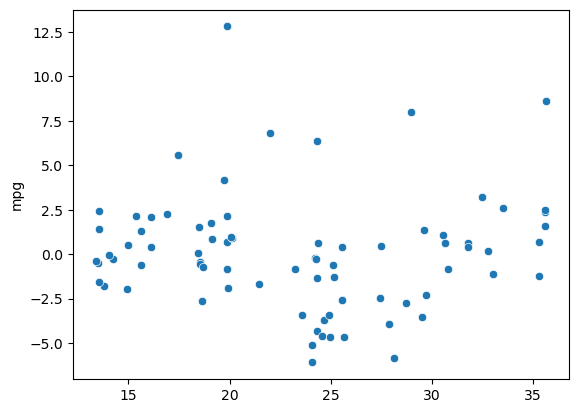

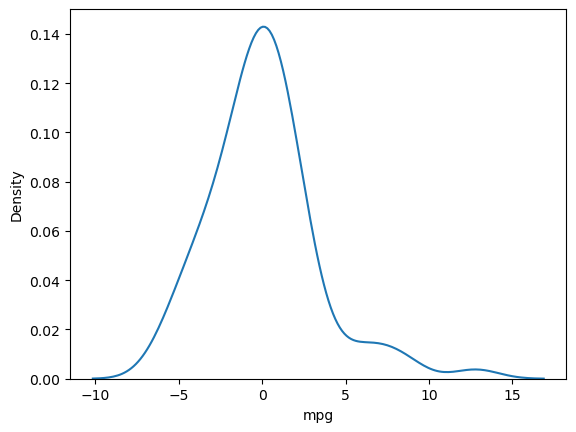

RandomForestRegressor(max_depth=3, min_samples_leaf=3, n_estimators=70)

In [42]:
rfhp=mymodel_regression(clf.best_estimator_)
rfhp

81% Accuracy

Classification Models

In [43]:
def multi_class(m):
    if m<23:
        return 0 #low
    else:
        return 1 #High

In [44]:
df["mpg_class"]=df["mpg"].apply(multi_class)

In [45]:
df["mpg_class"].value_counts()

mpg_class
0    196
1    196
Name: count, dtype: int64

In [46]:
features=df.drop(["mpg_class","mpg"],axis=1)
target=df["mpg_class"]

In [47]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=1,test_size=0.2,stratify=target)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(313, 7) (313,)
(79, 7) (79,)


In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def mymodel_class(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    #Overfitting-Underfiting check
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    c=pd.DataFrame(confusion_matrix(y_pred,y_test),index=["Low","High"],columns=["Low","High"])
    print("Confusion Matrix:\n",c)
    print("Classification Report:\n",classification_report(y_test,y_pred))
    return model

In [49]:
from sklearn.linear_model import LogisticRegression
mymodel_class(LogisticRegression())

Training Score 0.9073482428115016
Testing Score 0.8987341772151899
Confusion Matrix:
       Low  High
Low    33     2
High    6    38
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.86      0.95      0.90        40

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



LogisticRegression()

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=mymodel_class(DecisionTreeClassifier())
dtc

Training Score 1.0
Testing Score 0.8987341772151899
Confusion Matrix:
       Low  High
Low    36     5
High    3    35
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.92      0.88      0.90        40

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



DecisionTreeClassifier()

91% Accuracy and Training Score>Testing Score= Overfitting

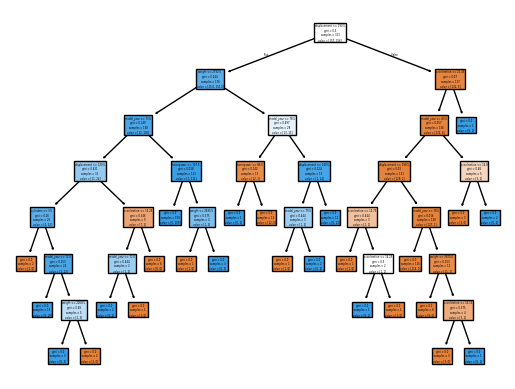

In [51]:
from sklearn import tree
tree.plot_tree(dtc,feature_names=x_train.columns,filled=True)
plt.show()

In [52]:
parameters={"max_depth":list(range(4,8)), "min_samples_split":list(range(2,6)), "min_samples_leaf":list(range(2,6))}

In [53]:
clf=GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_le

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=2)

In [54]:
dt_be=mymodel_class(clf.best_estimator_)

Training Score 0.9680511182108626
Testing Score 0.9113924050632911
Confusion Matrix:
       Low  High
Low    36     4
High    3    36
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.92      0.90      0.91        40

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79



95% Accuracy

In [55]:
from sklearn.ensemble import RandomForestClassifier
rtf=mymodel_class(RandomForestClassifier())
rtf

Training Score 1.0
Testing Score 0.9240506329113924
Confusion Matrix:
       Low  High
Low    36     3
High    3    37
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.93      0.93      0.93        40

    accuracy                           0.92        79
   macro avg       0.92      0.92      0.92        79
weighted avg       0.92      0.92      0.92        79



RandomForestClassifier()

92% Accuracy

In [60]:
parameters={"n_estimators":[70,80,120],"max_depth":list(range(4,6)), "min_samples_split":list(range(2,4)), "min_samples_leaf":list(range(2,6))}

In [61]:
clf=GridSearchCV(RandomForestClassifier(),parameters,verbose=2)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=2, min_s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5], 'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [70, 80, 120]},
             verbose=2)

In [63]:
rf_be=mymodel_class(clf.best_estimator_)

Training Score 0.9552715654952076
Testing Score 0.9367088607594937
Confusion Matrix:
       Low  High
Low    36     2
High    3    38
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.93      0.95      0.94        40

    accuracy                           0.94        79
   macro avg       0.94      0.94      0.94        79
weighted avg       0.94      0.94      0.94        79



In [64]:
import pickle
with open("mileage.pkl","wb") as f:
    pickle.dump(rf_be,f)